In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# these are the address of the file on your hard drive
ls_b5_address = r"D:\Dropbox\Dropbox\Teaching\AGIS_Spring_2022\Data\Landsat\LC08_L2SP_013032_20210616_20210622_02_T1\LC08_L2SP_013032_20210616_20210622_02_T1_SR_B5.TIF"
ls_b4_address = r"D:\Dropbox\Dropbox\Teaching\AGIS_Spring_2022\Data\Landsat\LC08_L2SP_013032_20210616_20210622_02_T1\LC08_L2SP_013032_20210616_20210622_02_T1_SR_B4.TIF"

In [7]:
# set the name of the address file
with rasterio.open(ls_b5_address,'r') as rst:
    # converting the array to 'float64' will enable us to use np.nan
    arB5 = (rst.read(1)).astype('float64')
    # read the meta data
    kwds = rst.meta.copy()
    # replace the nodata values with np.nan
    arB5[arB5 ==kwds['nodata']] = np.nan
    # scale the value to get the surface reflectance
    arB5_scaled = arB5 * 0.0000275 - 0.2
    
with rasterio.open(ls_b4_address,'r') as rst:
    arB4 = (rst.read(1)).astype('float64')
    kwds = rst.meta.copy()
    arB4[arB4 ==kwds['nodata']] = np.nan
    arB4_scaled = arB4 * 0.0000275 - 0.2

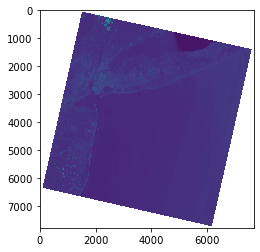

In [8]:
plt.imshow(arB4_scaled)

In [10]:
# calculate ndvi
arNDVI = (arB5_scaled-arB4_scaled)/(arB5_scaled+arB4_scaled)

In [12]:
# read the average value of ndvi for this area
np.nanmean(arNDVI)

0.22424873808297013

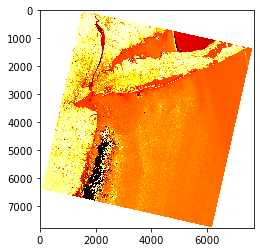

In [22]:
# adding vmin and vmax helps to see the layer
plt.imshow(arNDVI,interpolation='nearest', cmap=plt.get_cmap('hot'),  vmin=-1, vmax=1)